In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv("shampoo_sales.csv")

df['Month'] = pd.to_datetime('2025-' + df['Month'], format="%Y-%m-%d")

df.index = df['Month']
df.drop(["Month"], axis=1, inplace=True)

In [3]:
# start_date = "2025-01-01"
# dates = pd.date_range(start=start_date, end='2025-03-31', freq='D')

# d = dates[dates.day <= 12]

# df = pd.read_csv('shampoo_sales.csv', )

# df.drop(['Month'], axis=1, inplace=True)

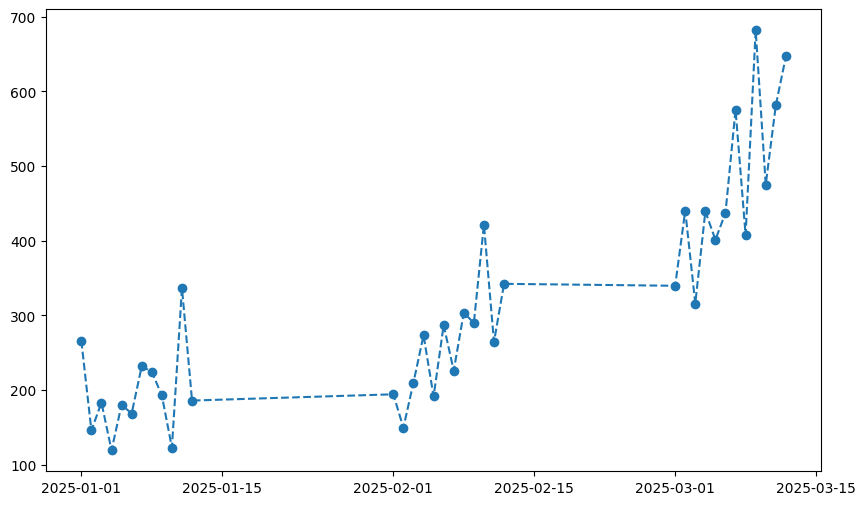

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df, marker='o', linestyle='--')
plt.show()

In [5]:
### Interpolation

train = df.asfreq('D')

train['Sales'] = train['Sales'].interpolate(method='linear')

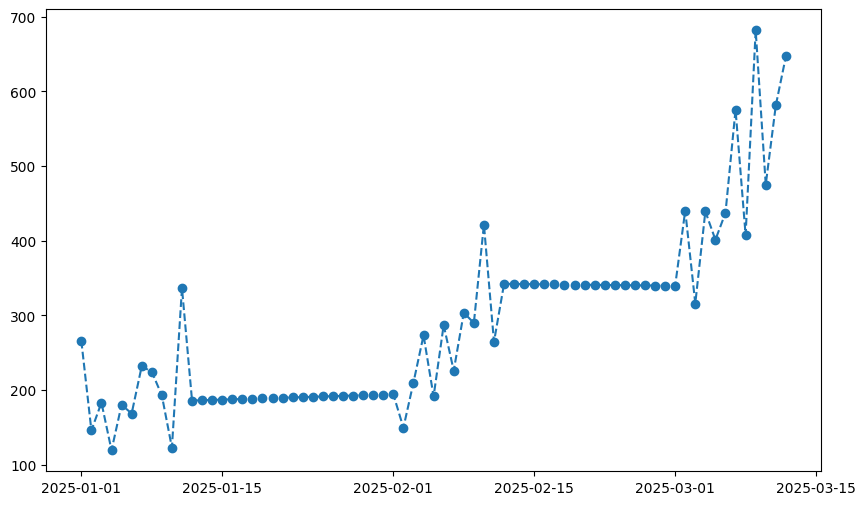

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(train, marker='o', linestyle='--')
plt.show()

In [7]:
first_part = df.loc[:"2025-01-12"]
second_part = df.loc["2025-02-01":'2025-02-12']
thirt_part = df.loc["2025-03-01":'2025-03-12']

In [8]:
from itertools import product

p = d = q = range(0, 2)

pdq = list(product(p, d, q))
Sesonal_lag = [(x[0], x[1], x[2], 12) for x in list(product(p, d, q))]

print(f"SARIMAX | pdq -> {pdq[1]} | PDQ -> {Sesonal_lag[1]} |")
print(f"SARIMAX | pdq -> {pdq[1]} | PDQ -> {Sesonal_lag[2]} |")
print(f"SARIMAX | pdq -> {pdq[2]} | PDQ -> {Sesonal_lag[3]} |")
print(f"SARIMAX | pdq -> {pdq[2]} | PDQ -> {Sesonal_lag[4]} |")

SARIMAX | pdq -> (0, 0, 1) | PDQ -> (0, 0, 1, 12) |
SARIMAX | pdq -> (0, 0, 1) | PDQ -> (0, 1, 0, 12) |
SARIMAX | pdq -> (0, 1, 0) | PDQ -> (0, 1, 1, 12) |
SARIMAX | pdq -> (0, 1, 0) | PDQ -> (1, 0, 0, 12) |


In [14]:
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
    for param_sesonal in Sesonal_lag:
        try:
            mod = SARIMAX(second_part, order=param, seasonal_order=param_sesonal)
            result = mod.fit()
            
            print(f"SARIMAX | paramtrs -> {param} | paramert seseonal -> {param_sesonal} | aic -> {result.aic}")
        except:
            continue

SARIMAX | paramtrs -> (0, 0, 0) | paramert seseonal -> (0, 0, 0, 12) | aic -> 170.6248175424868
SARIMAX | paramtrs -> (0, 0, 0) | paramert seseonal -> (0, 0, 1, 12) | aic -> 172.624818494315
SARIMAX | paramtrs -> (0, 0, 0) | paramert seseonal -> (0, 1, 0, 12) | aic -> 2.0
SARIMAX | paramtrs -> (0, 0, 0) | paramert seseonal -> (0, 1, 1, 12) | aic -> 4.0
SARIMAX | paramtrs -> (0, 0, 0) | paramert seseonal -> (1, 0, 0, 12) | aic -> 172.62481754249555
SARIMAX | paramtrs -> (0, 0, 0) | paramert seseonal -> (1, 0, 1, 12) | aic -> 174.62481754265463
SARIMAX | paramtrs -> (0, 0, 0) | paramert seseonal -> (1, 1, 1, 12) | aic -> 6.0
SARIMAX | paramtrs -> (0, 0, 1) | paramert seseonal -> (0, 0, 0, 12) | aic -> 164.9552394443546
SARIMAX | paramtrs -> (0, 0, 1) | paramert seseonal -> (0, 0, 1, 12) | aic -> 166.47157718032358
SARIMAX | paramtrs -> (0, 0, 1) | paramert seseonal -> (0, 1, 0, 12) | aic -> 4.0
SARIMAX | paramtrs -> (0, 0, 1) | paramert seseonal -> (0, 1, 1, 12) | aic -> 6.0
SARIMAX | pa

In [11]:
### SARIMAX | paramtrs -> (0, 0, 0) | paramert seseonal -> (0, 1, 0, 12) | aic -> 2.0

model = SARIMAX(first_part, order=(0, 0, 0), seasonal_order=(0, 1, 0, 12))
res_model = model.fit()

In [12]:
first_predict = res_model.predict(start='2025-01-12', end="2025-01-31")

In [13]:
first_pred = first_predict.loc['2025-01-13':]

In [14]:
new_first = np.hstack([first_part.values.reshape(-1), first_pred.values.reshape(-1)])
new_first.shape

(31,)

In [16]:
df_first = pd.DataFrame(new_first, index=pd.date_range(start='2025-01-01', end='2025-01-31'))

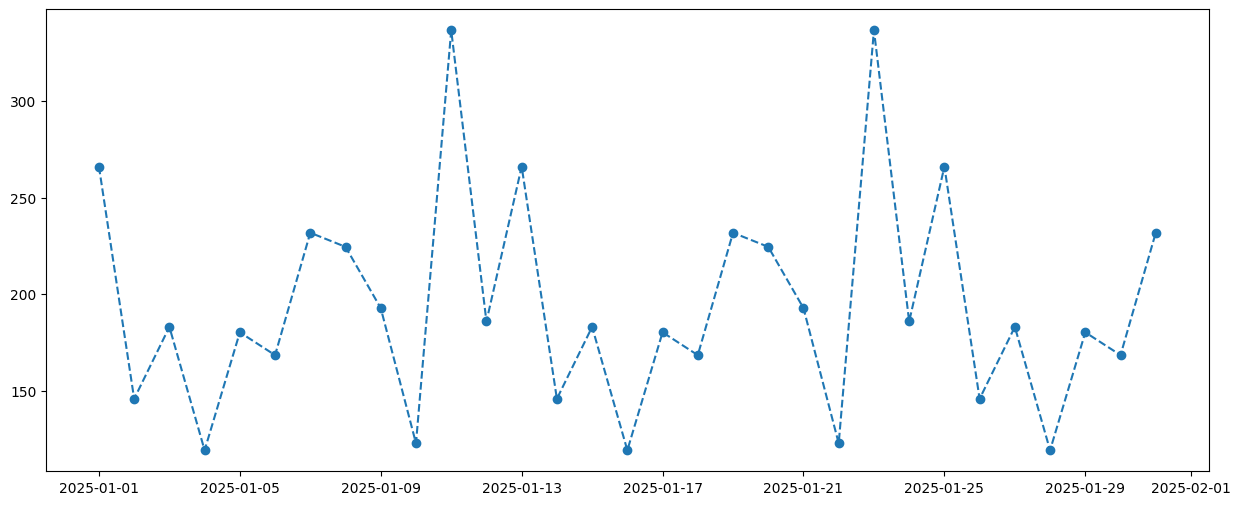

In [17]:
plt.figure(figsize=(15, 6))
plt.plot(df_first, marker='o', linestyle='--')
plt.show()

------------------------------

In [19]:
#### paramtrs -> (0, 0, 0) | paramert seseonal -> (0, 1, 0, 12) #### second_part

model_2 = SARIMAX(second_part, order=(0, 0, 0), seasonal_order=(0, 1, 0, 12))
res_model_2 = model_2.fit()

In [20]:
second_predict = res_model_2.predict(start='2025-02-13', end='2025-02-28')
second_predict

2025-02-13    194.3
2025-02-14    149.5
2025-02-15    210.1
2025-02-16    273.3
2025-02-17    191.4
2025-02-18    287.0
2025-02-19    226.0
2025-02-20    303.6
2025-02-21    289.9
2025-02-22    421.6
2025-02-23    264.5
2025-02-24    342.3
2025-02-25    194.3
2025-02-26    149.5
2025-02-27    210.1
2025-02-28    273.3
Freq: D, Name: predicted_mean, dtype: float64

--------------

In [15]:
##### (0, 1, 0) | paramert seseonal -> (0, 1, 0, 12

model_3 = SARIMAX(thirt_part, order=(0, 1, 0), seasonal_order=(0, 1, 0, 12))
fit_model_3 = model_3.fit()

In [16]:
thirt_predict = fit_model_3.predict(start='2025-03-13', end='2025-03-31')

In [21]:
result = np.hstack([first_part.values.reshape(-1), first_pred.values.reshape(-1),
                    second_part.values.reshape(-1), second_predict.values.reshape(-1),
                    thirt_part.values.reshape(-1), thirt_predict.values.reshape(-1)])
result.shape

(90,)

In [22]:
finall_df = pd.DataFrame(result, index=pd.date_range(start='2025-01-01', end='2025-03-31'))

In [23]:
finall_df

,0
2025-01-01,266.0
2025-01-02,145.9
2025-01-03,183.1
2025-01-04,119.3
2025-01-05,180.3
...,...
2025-03-27,1270.0
2025-03-28,1393.4
2025-03-29,1355.4
2025-03-30,1391.5


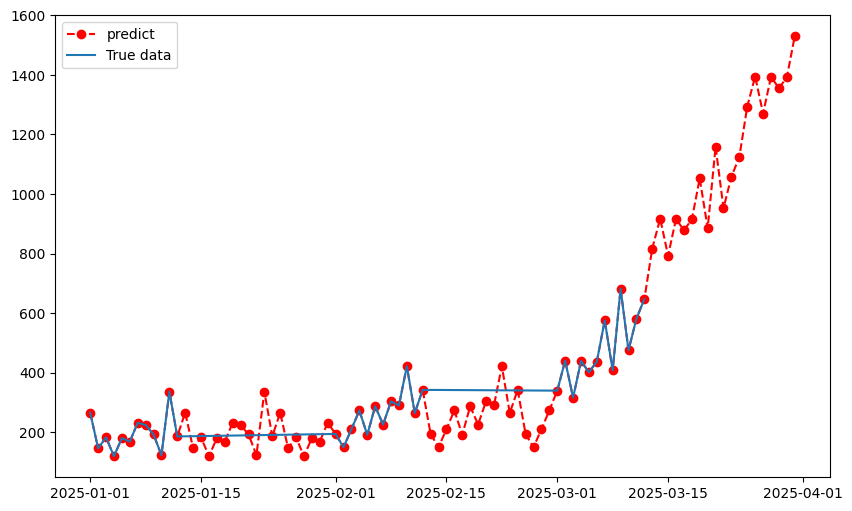

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(finall_df, marker='o', linestyle='--', c='r', label='predict')
plt.plot(df, label='True data')
plt.legend()
plt.show()

In [25]:
df_new = finall_df.copy()

In [27]:
finall_df.to_csv('finall_shampo')

-----------------

In [159]:
df_new.columns = ['Sales']